In [1]:
import os
import warnings

import numpy as np
import pandas as pd

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
files = os.listdir("../data/raw")

In [3]:
len(files)

49

In [4]:
df = pd.DataFrame()
for i, file in enumerate(files):
    if i == 0:
        temp_df = pd.read_csv(f"../data/raw/{file}")
        temp_df.iloc[:, 1] = temp_df.iloc[:, 1].replace(".", np.NaN)
        temp_df.iloc[:, 1] = temp_df.iloc[:, 1].astype(float)
        temp_df["DATE"] = pd.to_datetime(temp_df["DATE"])
        temp_df.set_index("DATE", inplace=True)
        temp_df = temp_df.resample("M").mean()
        temp_df.reset_index(inplace=True)
        df = temp_df
    else:
        temp_df = pd.read_csv(f"../data/raw/{file}")
        temp_df.iloc[:, 1] = temp_df.iloc[:, 1].replace(".", np.NaN)
        temp_df.iloc[:, 1] = temp_df.iloc[:, 1].astype(float)
        temp_df["DATE"] = pd.to_datetime(temp_df["DATE"])
        temp_df.set_index("DATE", inplace=True)
        temp_df = temp_df.resample("M").mean()
        temp_df.reset_index(inplace=True)
        df = pd.merge(df, temp_df, how="left")

In [5]:
df = df.query("DATE > '1990-01-01'")

In [6]:
df.fillna(method="ffill", inplace=True)
# df.fillna(method="bfill", inplace=True)

In [7]:
tags = pd.read_excel("../data/tags/tags.xlsx")

In [8]:
tags_dict = {}
for i in range(len(tags)):
    tags_dict[f"{tags.loc[i, 'Tags']}"] = tags.loc[i, "Definition"]

In [9]:
df.columns

Index(['DATE', 'A091RC1Q027SBEA', 'A939RX0Q048SBEA', 'BOGMBASE', 'CCSA',
       'CORESTICKM159SFRBATL', 'CPIAUCSL', 'CPILFESL', 'DEXUSEU', 'DGS10',
       'DJIA', 'DPCCRV1Q225SBEA', 'FEDFUNDS', 'FPCPITOTLZGUSA', 'FYFSGDA188S',
       'GDP', 'GDPC1', 'GFDEGDQ188S', 'IMPGS', 'IQ', 'IR', 'LNS14000006',
       'M1SL', 'M2REAL', 'M2SL', 'M2V', 'MEHOINUSA672N', 'MORTGAGE30US',
       'NASDAQCOM', 'PAYEMS', 'PCE', 'PCEC96', 'PCEPI', 'PCU325211325211',
       'PCU325325', 'PCU32733273', 'PCUOMFGOMFG', 'PPIACO', 'PPIFIS',
       'SP500_full', 'T10Y2Y', 'TOTRESNS', 'UNEMPLOY', 'UNRATE', 'VIXCLS',
       'W825RC1', 'WPU061', 'WPU0911', 'WPU10170502', 'WPU101707'],
      dtype='object')

In [10]:
col_for_plots = [
    "A091RC1Q027SBEA",
    "A939RX0Q048SBEA",
    "BOGMBASE",
    "CCSA",
    "CORESTICKM159SFRBATL",
    "CPIAUCSL",
    "CPILFESL",
    "DEXUSEU",
    "DGS10",
    "DJIA",
    "DPCCRV1Q225SBEA",
    "FEDFUNDS",
    "FPCPITOTLZGUSA",
    "FYFSGDA188S",
    "GDP",
    "GDPC1",
    "GFDEGDQ188S",
    "IMPGS",
    "IQ",
    "IR",
    "LNS14000006",
    "M1SL",
    "M2REAL",
    "M2SL",
    "M2V",
    "MEHOINUSA672N",
    "MORTGAGE30US",
    "NASDAQCOM",
    "PAYEMS",
    "PCE",
    "PCEC96",
    "PCEPI",
    "PCU325211325211",
    "PCU325325",
    "PCU32733273",
    "PCUOMFGOMFG",
    "PPIACO",
    "PPIFIS",
    "T10Y2Y",
    "TOTRESNS",
    "UNEMPLOY",
    "UNRATE",
    "VIXCLS",
    "W825RC1",
    "WPU061",
    "WPU0911",
    "WPU10170502",
    "WPU101707",
]

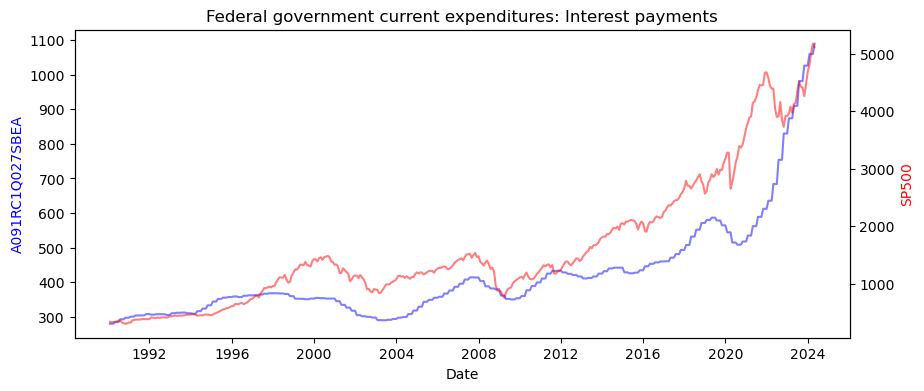

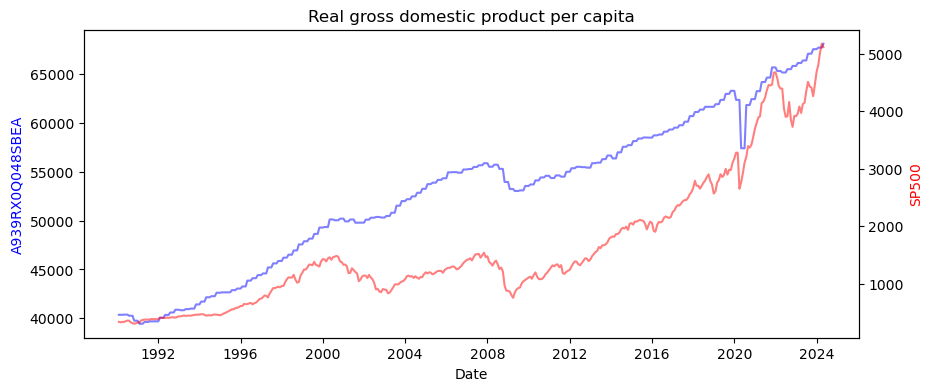

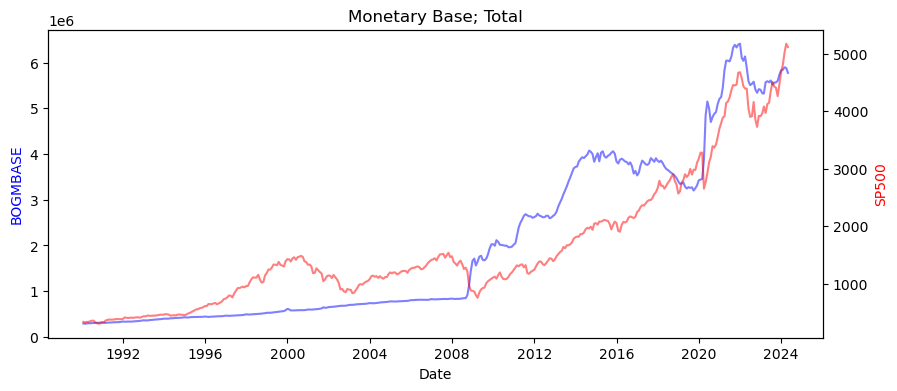

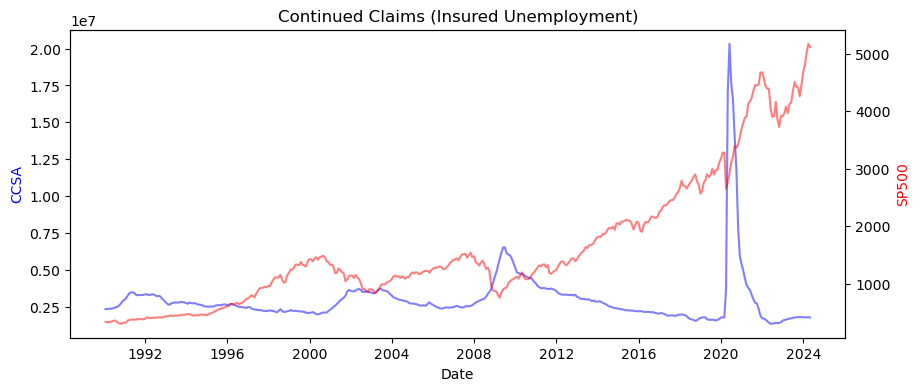

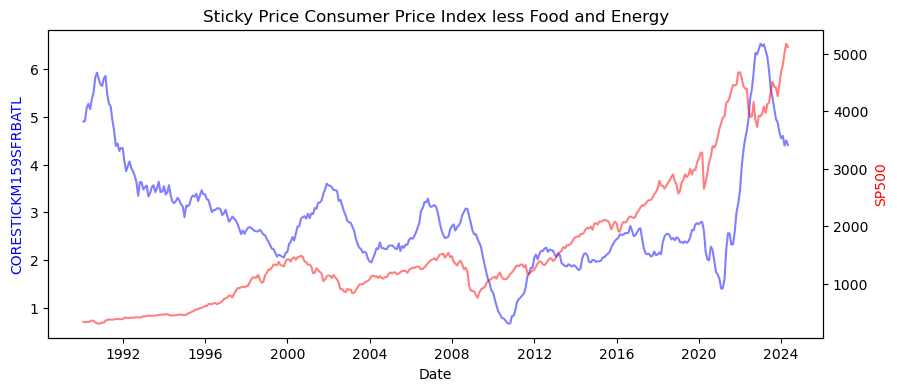

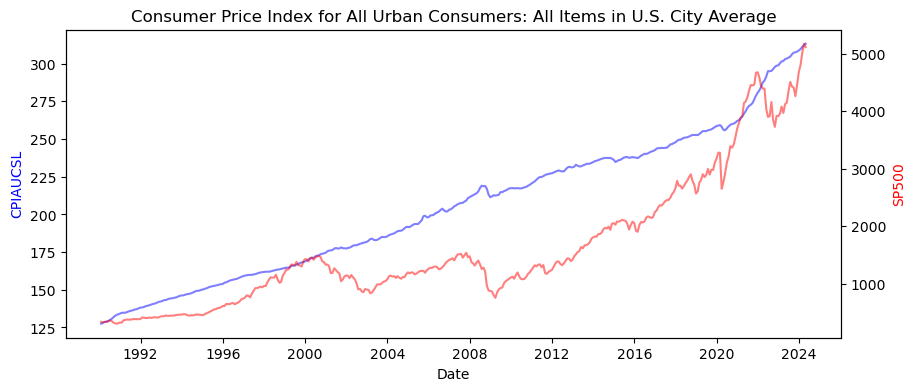

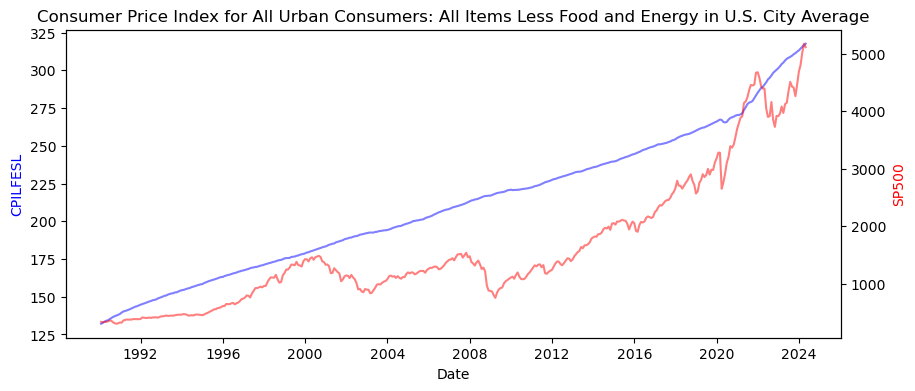

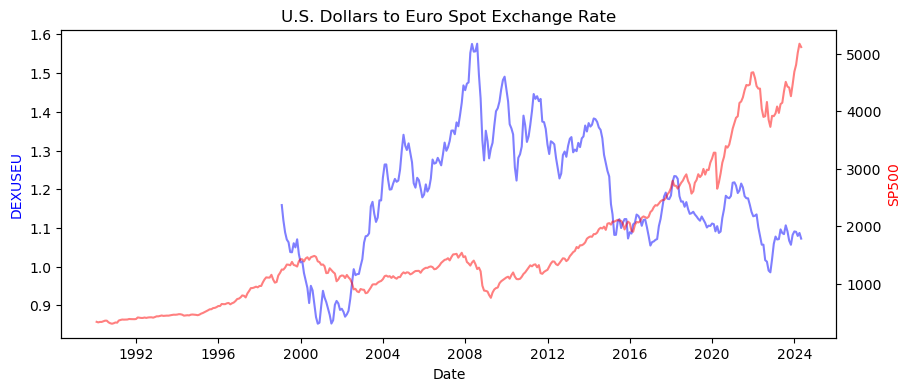

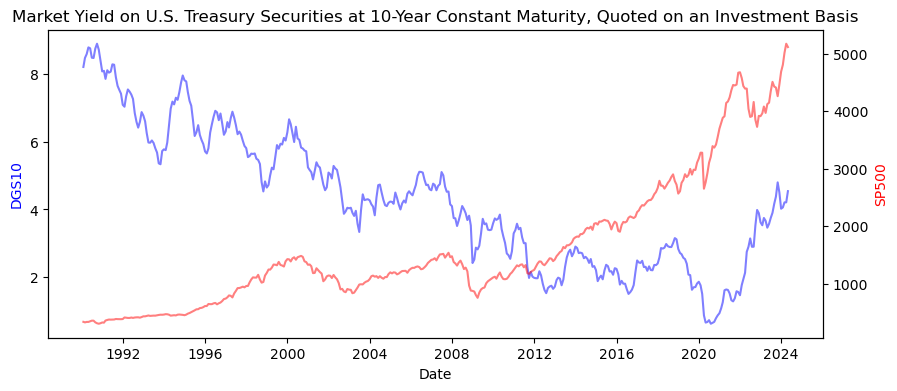

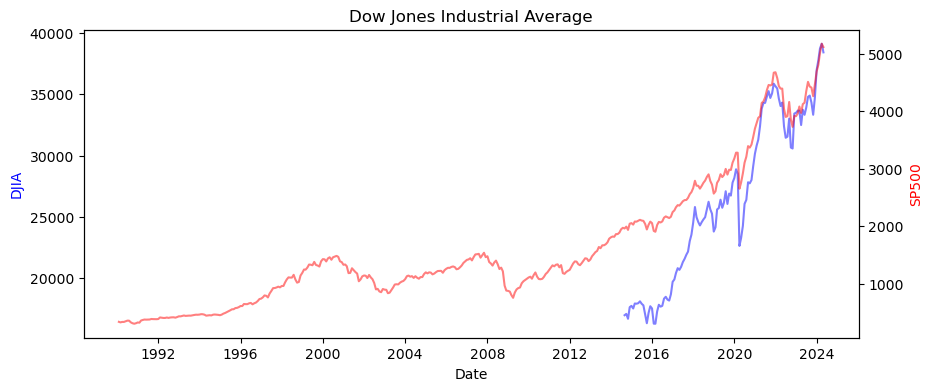

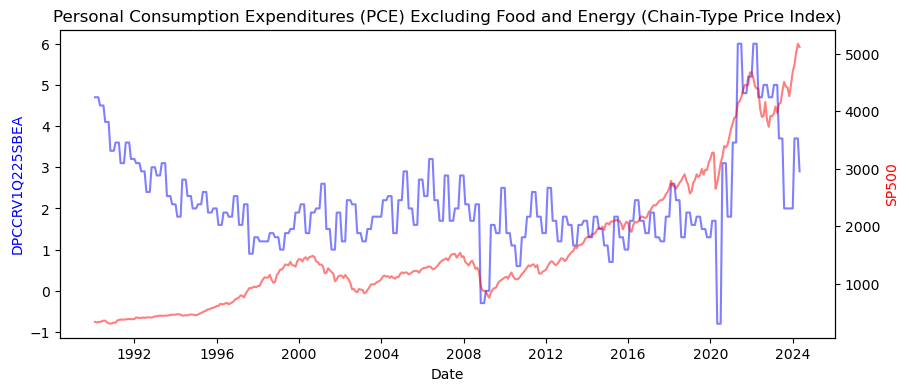

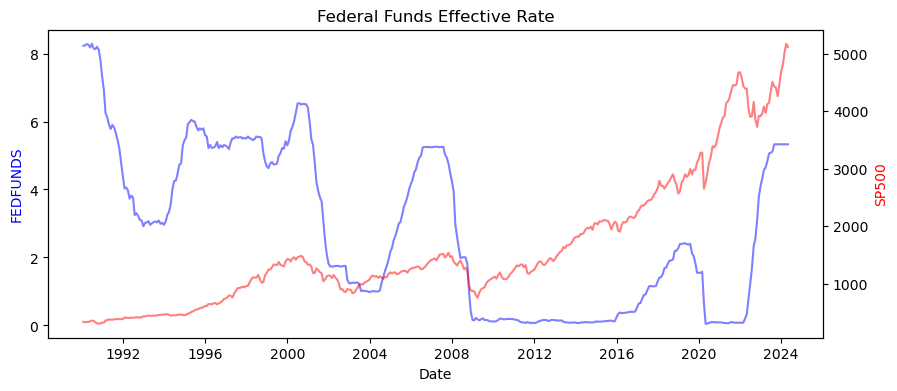

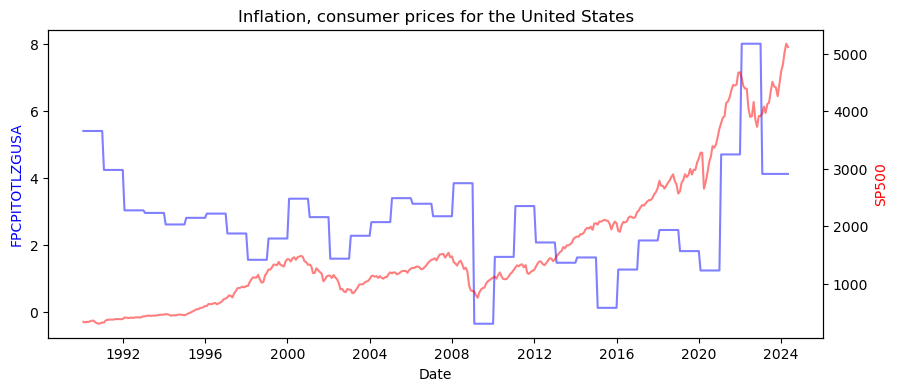

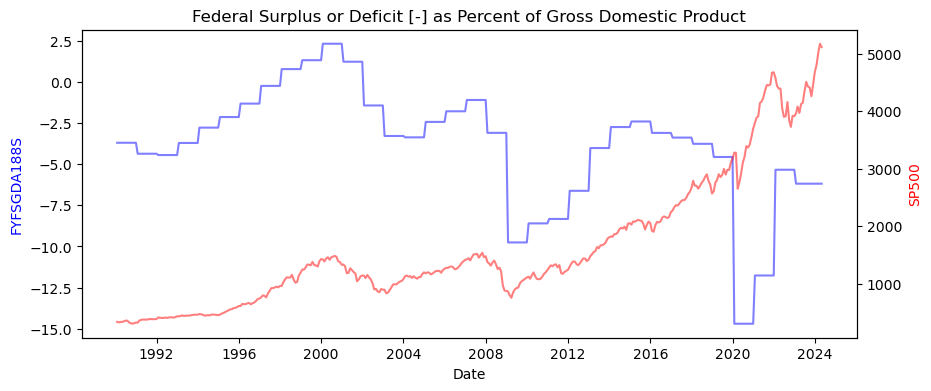

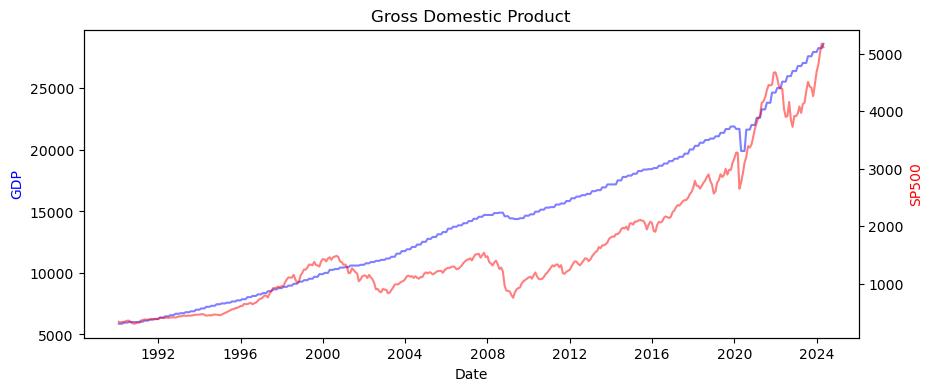

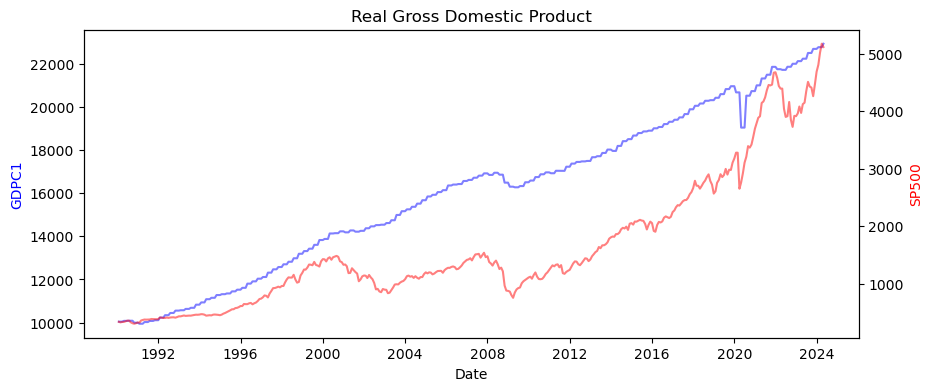

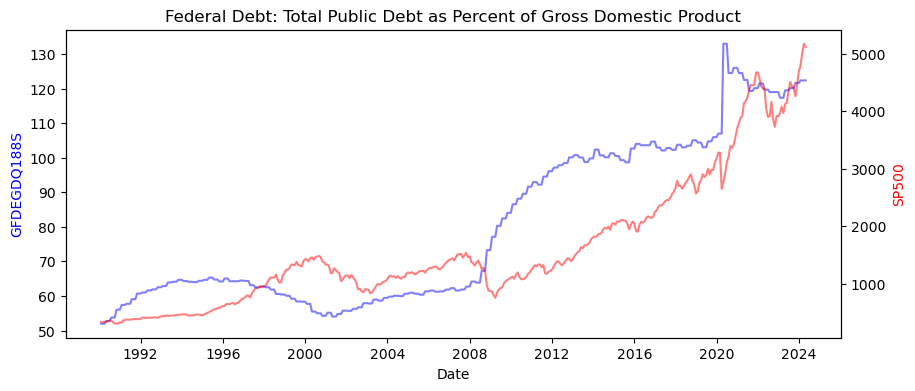

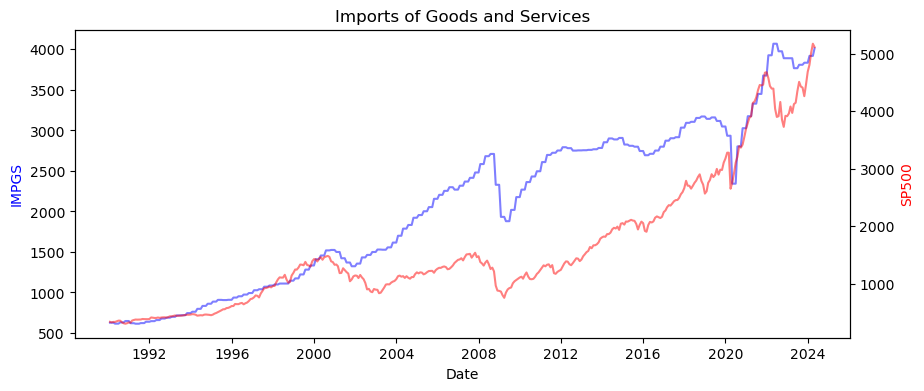

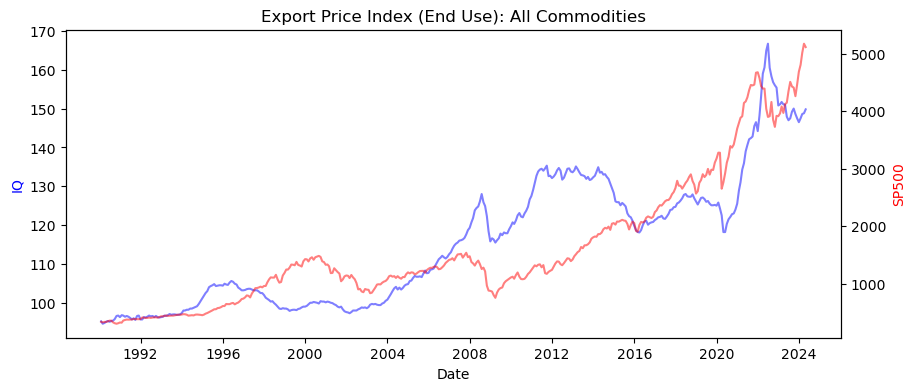

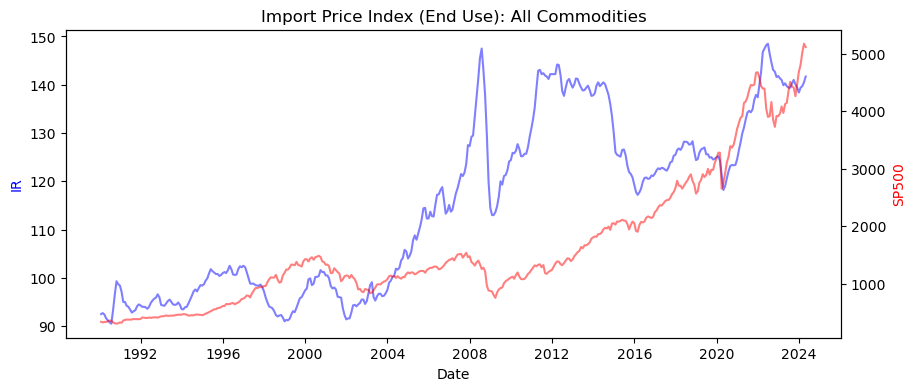

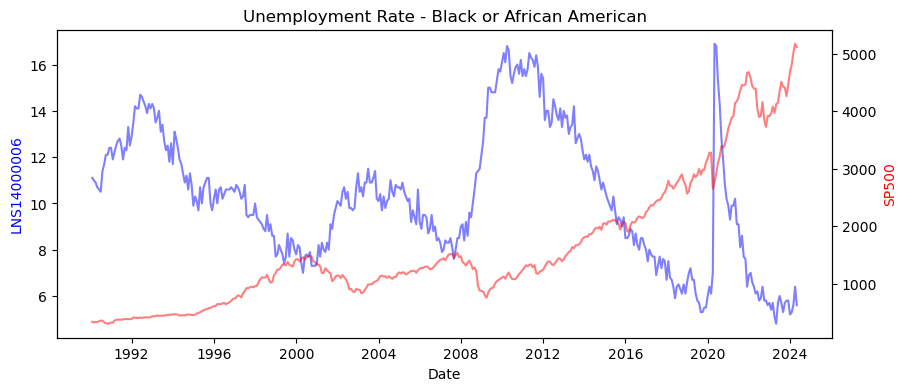

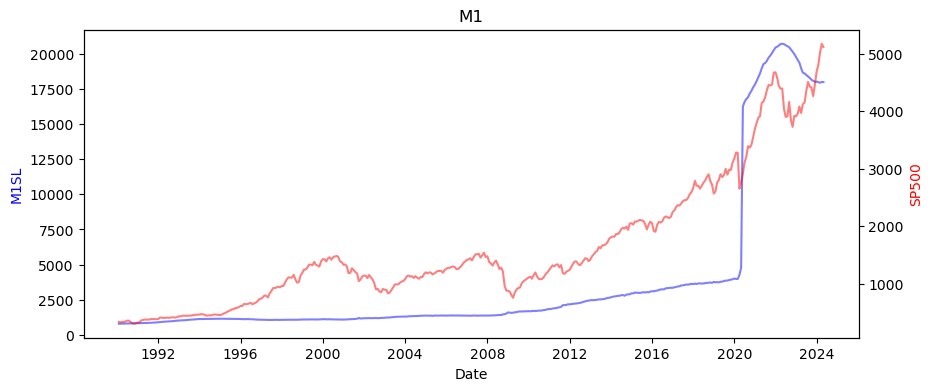

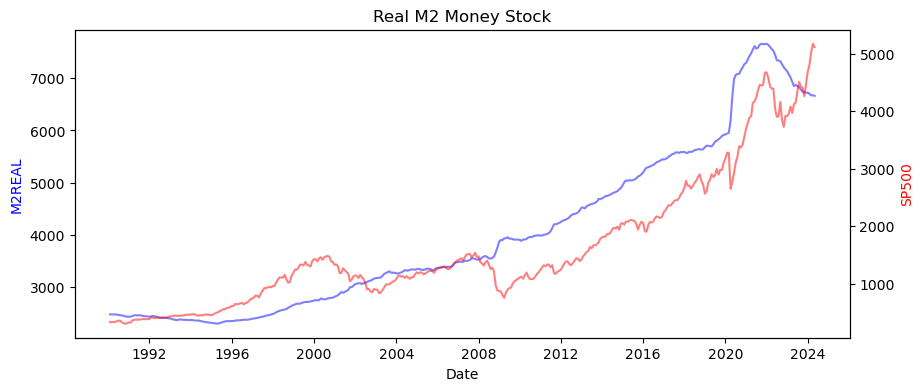

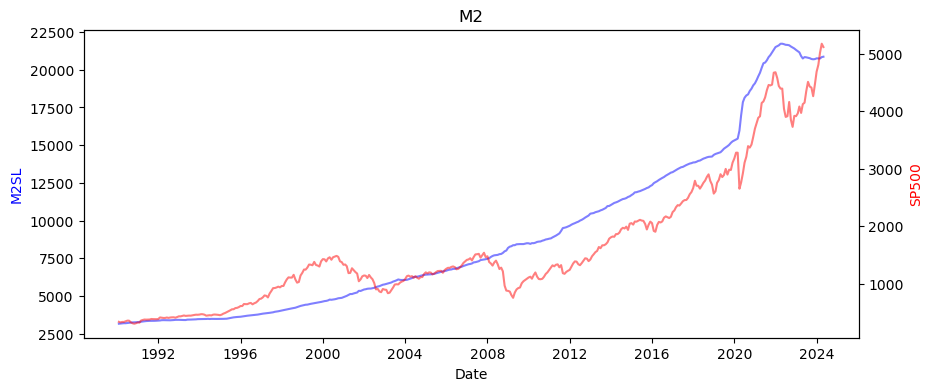

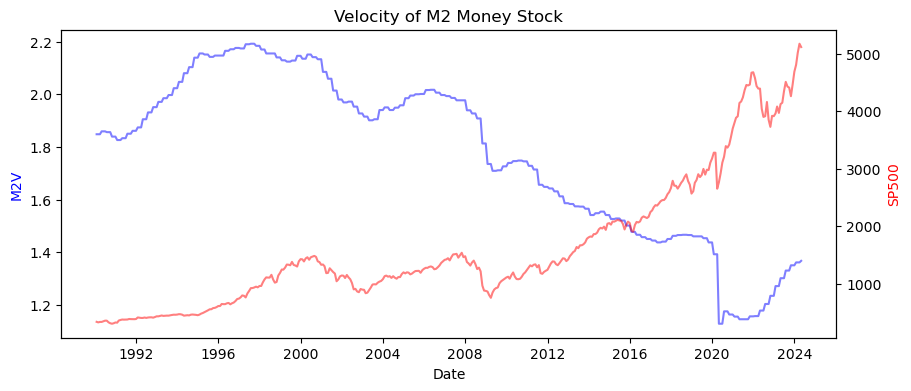

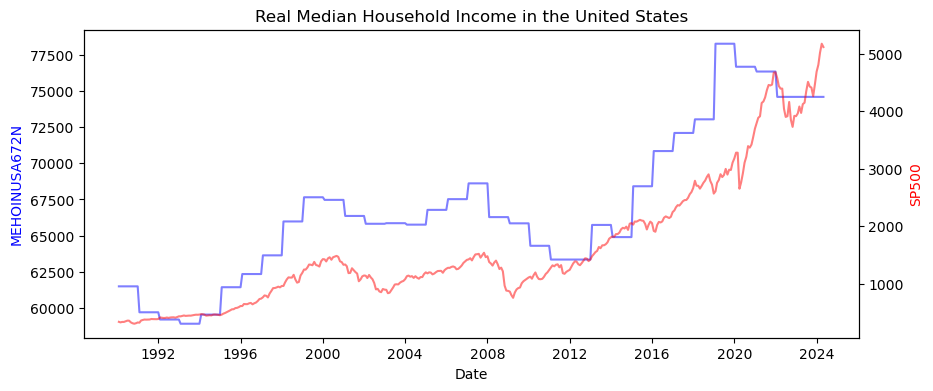

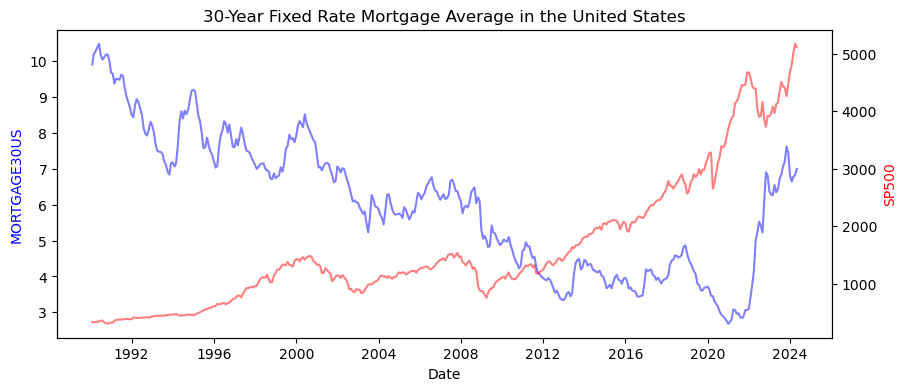

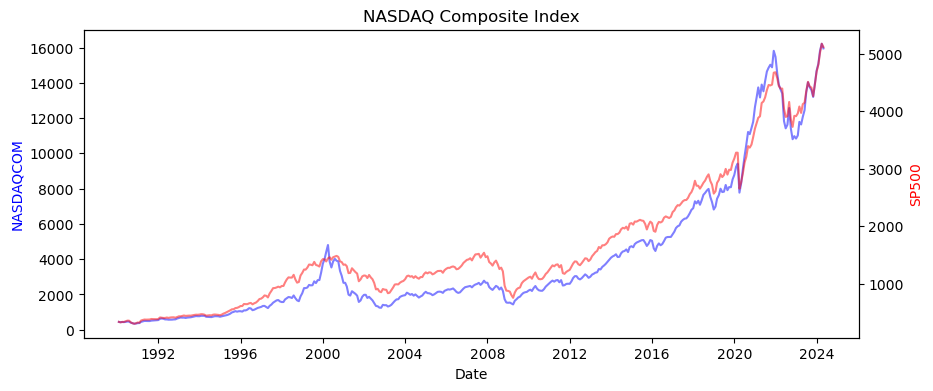

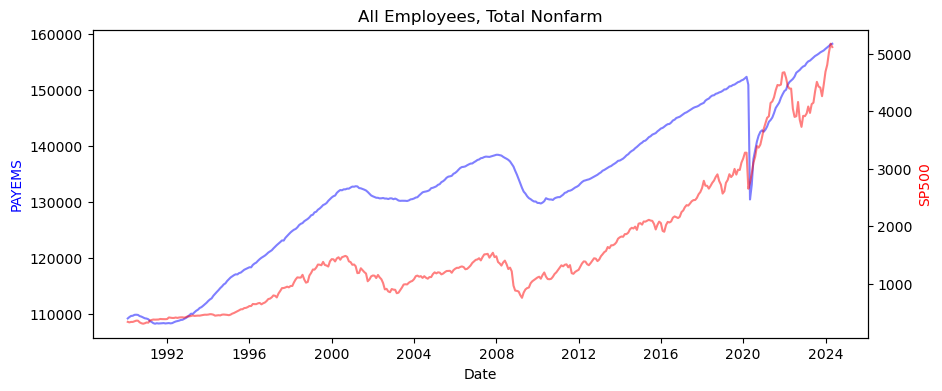

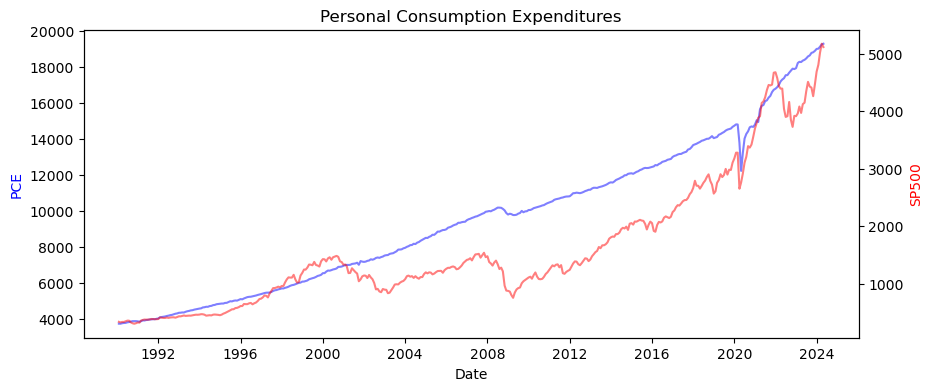

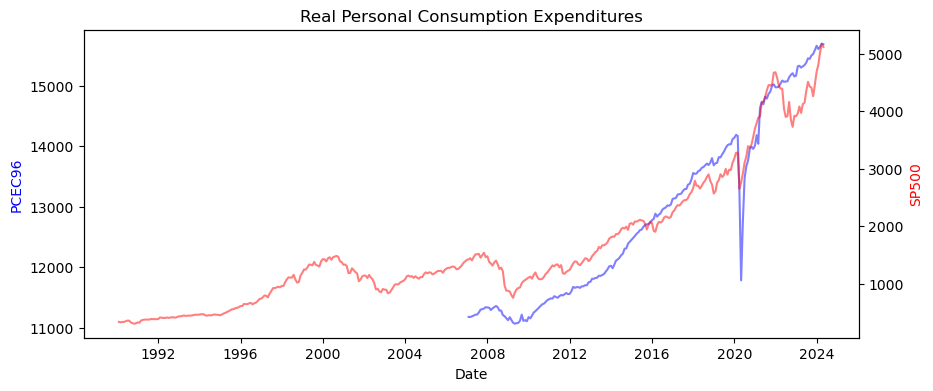

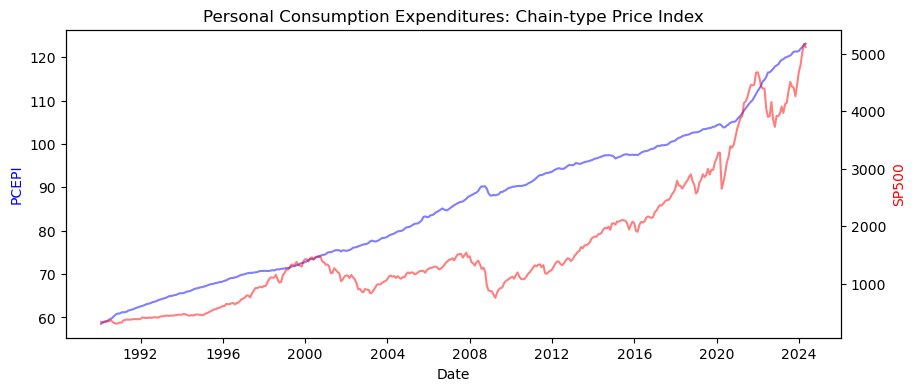

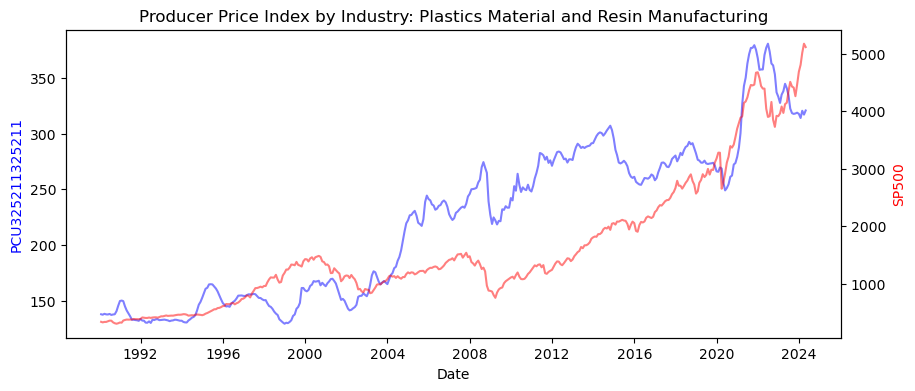

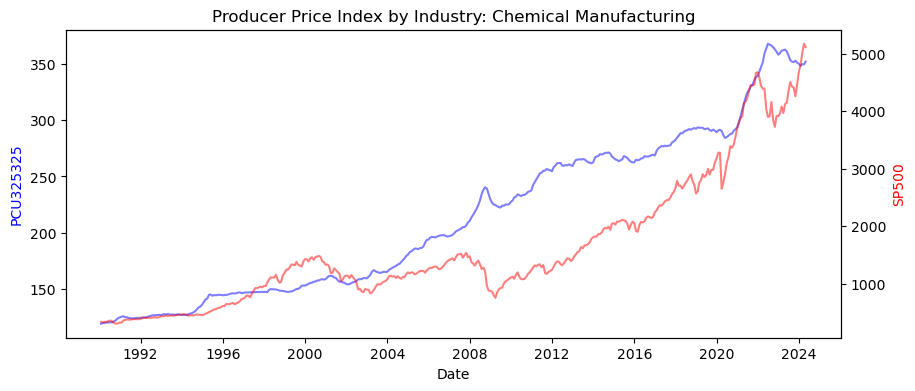

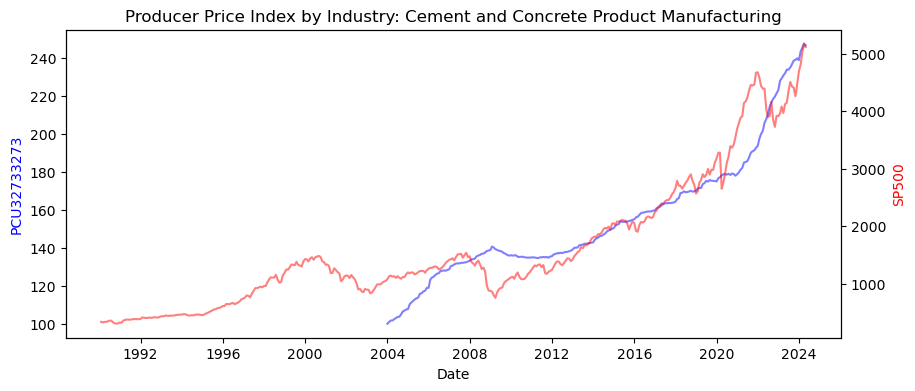

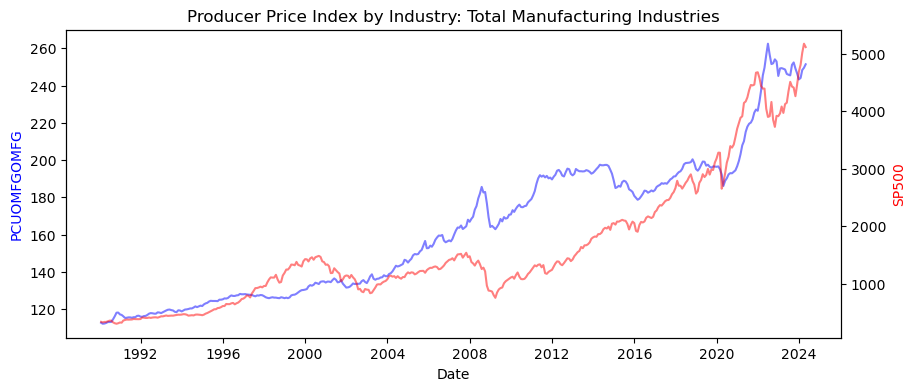

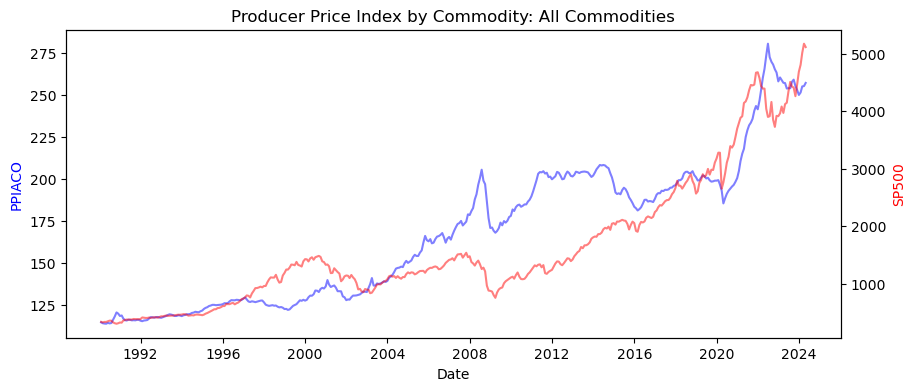

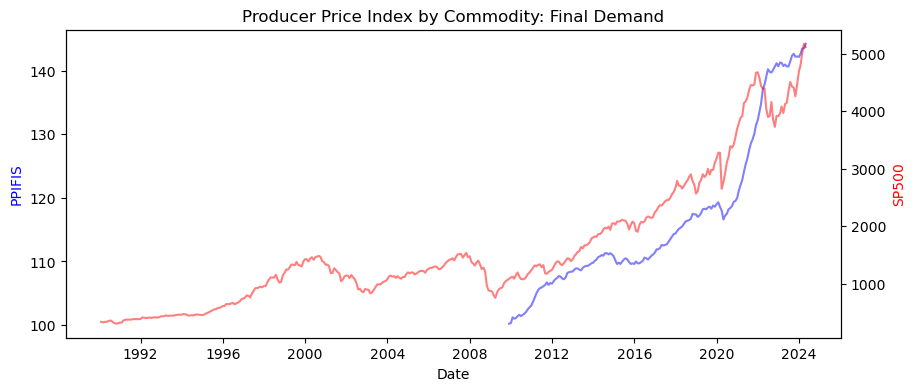

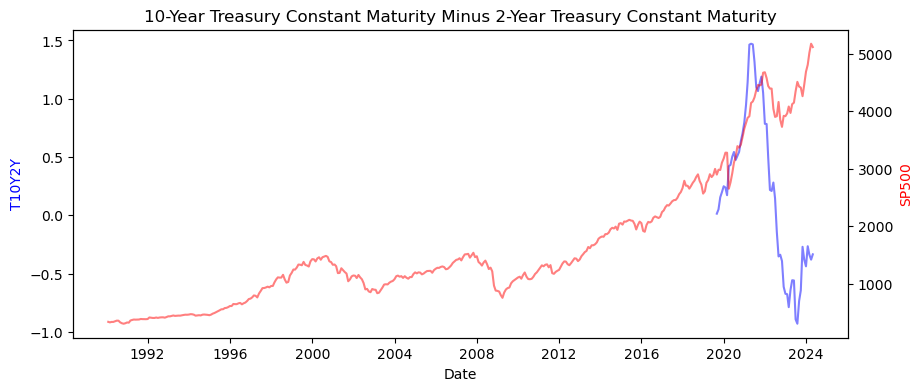

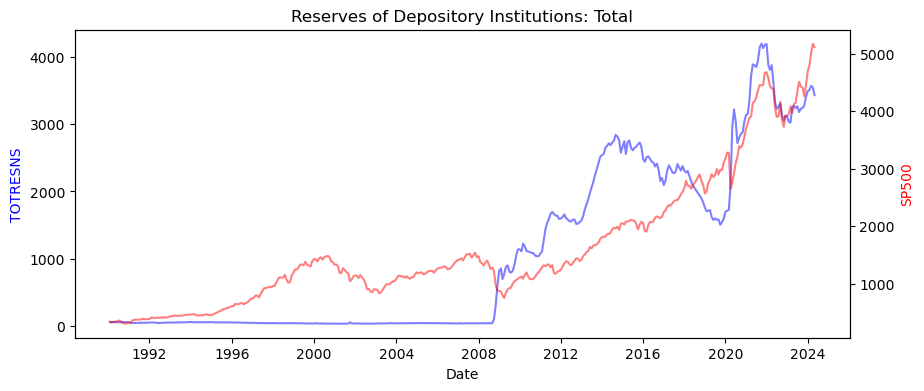

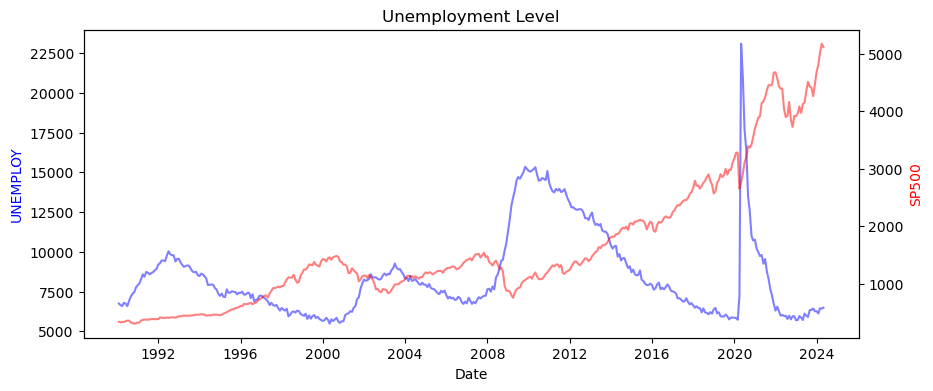

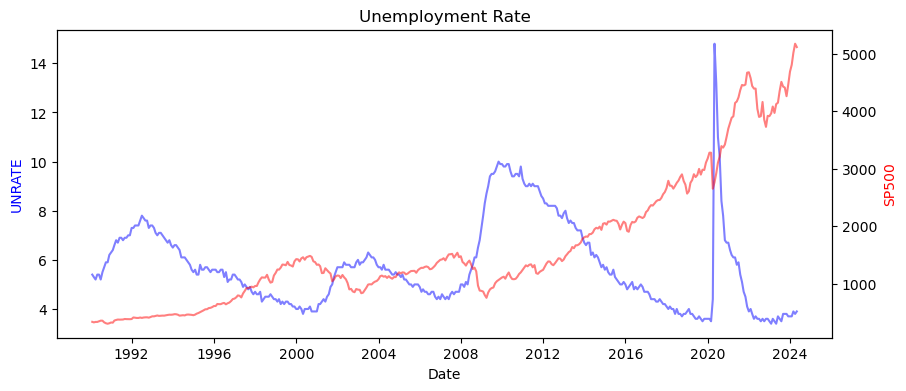

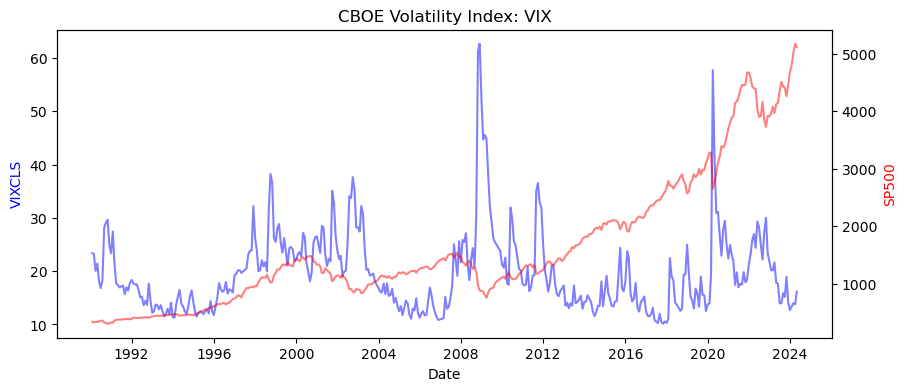

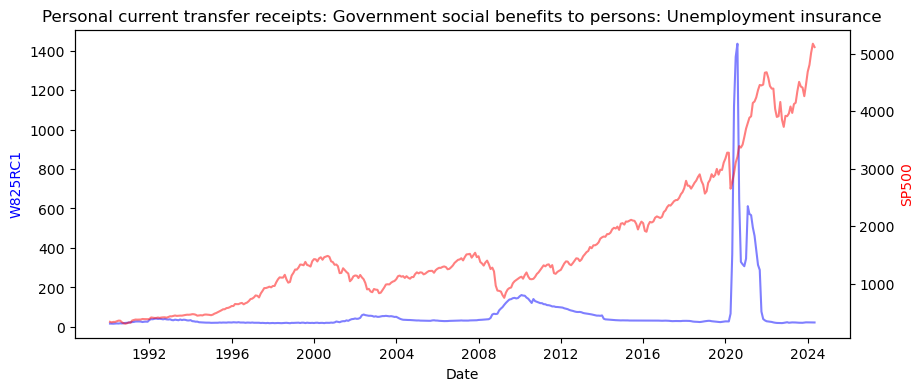

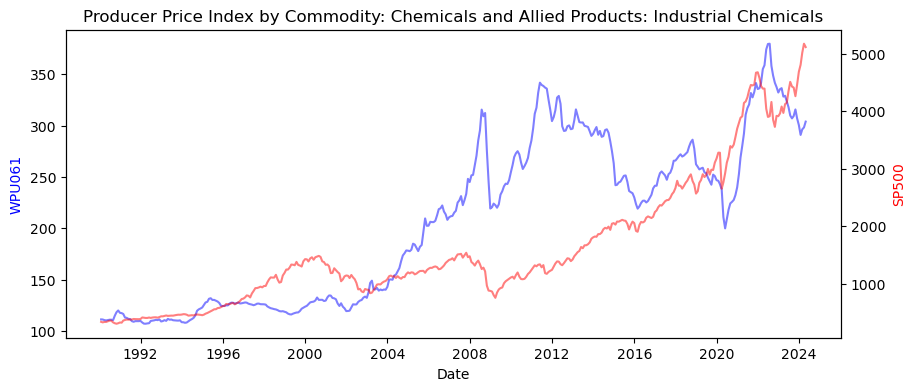

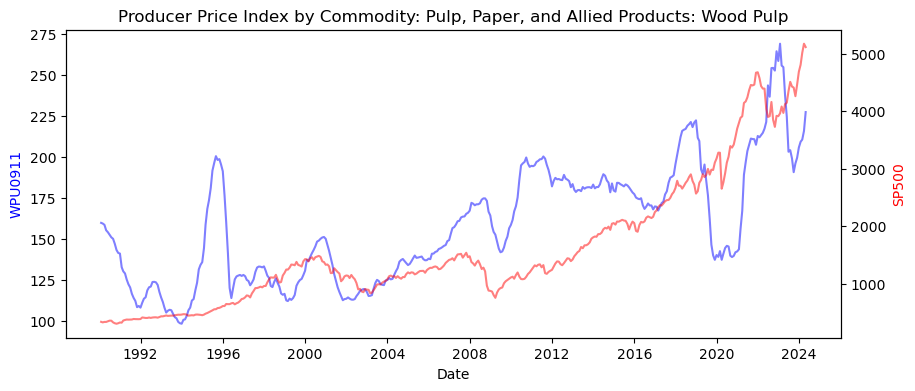

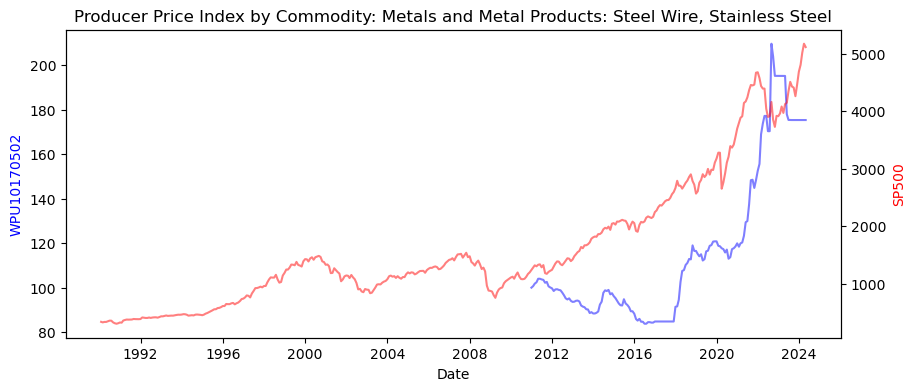

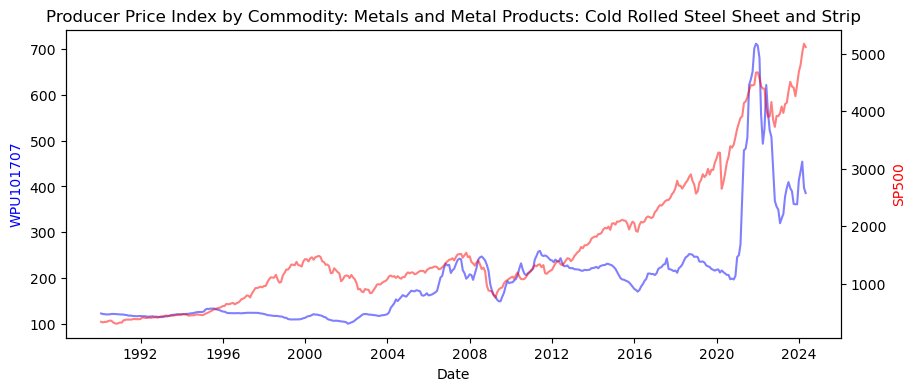

In [11]:
for col in col_for_plots:
    fig, ax1 = plt.subplots(figsize=(10, 4))
    ax2 = ax1.twinx()
    ax1.plot(df["DATE"], df[col], label=col, color="blue", alpha=0.5)
    ax2.plot(df["DATE"], df["SP500_full"], label="SP500", color="red", alpha=0.5)
    
    ax1.set_xlabel('Date')
    ax1.set_ylabel(col, color='blue')
    ax2.set_ylabel('SP500', color='red')
    
    plt.title(tags_dict[col])
    plt.show();